In [1]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import pickle


from unidecode import unidecode

from sklearn.preprocessing import LabelEncoder  

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
cd drive/MyDrive/Code/

/content/drive/MyDrive/Code


In [5]:
sns.set_theme(style='whitegrid')
sns.set_color_codes('pastel')

In [6]:
dados_mun = pd.read_csv('Municipios/dadosdemograficos_RS.csv', sep=';')
dados_srag = pd.read_pickle('dados_srag.pickle')
dados_sivep = pd.read_pickle('dados_sivep.pickle')

In [7]:
dados_mun = dados_mun.fillna(0)
dados_mun['municipio'] = dados_mun['municipio'].str.lower()
dados_mun['municipio'] = dados_mun['municipio'].apply(unidecode)

dados_mun['municipio'] = dados_mun['municipio'].replace("sant'ana do livramento", 'santana do livramento')

In [8]:
dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].str.lower()
dados_sivep['municipio'] = dados_sivep['municipio'].apply(unidecode)
dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].apply(unidecode)

dados_sivep['municipionotificacao'] = dados_sivep['municipionotificacao'].replace("sant'ana do livramento", 'santana do livramento')
dados_sivep['municipio'] = dados_sivep['municipio'].replace("sant'ana do livramento", 'santana do livramento')
# dados_sivep['sexo'] = dados_sivep['sexo'].replace('Feminino', 0)
# dados_sivep['sexo'] = dados_sivep['sexo'].replace('Masculino', 1)


# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Branca', 1)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Preta', 2)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Amarela', 3)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Parda', 4)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Indígena', 5)
# dados_sivep['racacor'] = dados_sivep['racacor'].replace('Ignorado', 9)

In [9]:
dados_srag['municipio'] = dados_srag['municipio'].str.lower()
dados_srag['municipionotificacao'] = dados_srag['municipionotificacao'].str.lower()

dados_srag['sexo'] = dados_srag['sexo'].replace('F', 'Feminino')
dados_srag['sexo'] = dados_srag['sexo'].replace('M', 'Masculino')

dados_srag['racacor'] = dados_srag['racacor'].replace(1, 'Branca')
dados_srag['racacor'] = dados_srag['racacor'].replace(2, 'Preta')
dados_srag['racacor'] = dados_srag['racacor'].replace(3, 'Amarela')
dados_srag['racacor'] = dados_srag['racacor'].replace(4, 'Parda')
dados_srag['racacor'] = dados_srag['racacor'].replace(5, 'Indígena')
dados_srag['racacor'] = dados_srag['racacor'].replace(9, 'Ignorado')

In [10]:
dados_sivep = dados_sivep[dados_sivep['municipio'] != 'pinto bandeira']
dados_srag = dados_srag[dados_srag['municipio'] != 'pinto bandeira']
dados_sivep = dados_sivep[dados_sivep['municipionotificacao'] != 'pinto bandeira']
dados_srag = dados_srag[dados_srag['municipionotificacao'] != 'pinto bandeira']

In [11]:
municipio_le = LabelEncoder()
municipio_le.fit(dados_sivep['municipionotificacao'])

LabelEncoder()

In [12]:
dados_srag['municipio'] = municipio_le.transform(dados_srag['municipio'].values)
dados_srag['municipionotificacao'] = municipio_le.transform(dados_srag['municipionotificacao'].values)

dados_sivep['municipio'] = municipio_le.transform(dados_sivep['municipio'].values)
dados_sivep['municipionotificacao'] = municipio_le.transform(dados_sivep['municipionotificacao'].values)

dados_mun['municipio'] = municipio_le.transform(dados_mun['municipio'].values)

In [13]:
# Exporta a codificação dos municipios
output = open('municipios.pkl', 'wb')
pickle.dump(municipio_le, output)
output.close()

In [14]:
dados_covid = pd.concat([dados_sivep, dados_srag], ignore_index=True)

In [15]:
# Fonte https://infoms.saude.gov.br/extensions/covid-19_html/covid-19_html.html
print("O percentual de casos considerados para o treinamento em relação a\nquantidade de casos confirmados no Estado do RS para o ano de 2021 é:")
print("{:.2f}%".format((dados_covid.shape[0]/1507117)*100))

O percentual de casos considerados para o treinamento em relação a
quantidade de casos confirmados no Estado do RS para o ano de 2021 é:
71.08%


In [16]:
dados_covid

,municipionotificacao,sexo,racacor,municipio,datanotificacao,datainiciosintomas,idade,sem_not,faixa_etaria,dias_atenot,qnt_sintomas,qnt_comorbidades
0,355,Feminino,Branca,355,2021-01-11,2021-01-01,24.0,53,"(19, 39]",10.0,2,0
1,95,Masculino,Ignorado,95,2021-03-11,2021-03-02,45.0,9,"(39, 49]",9.0,1,0
2,324,Feminino,Branca,324,2021-06-10,2021-06-06,46.0,22,"(39, 49]",4.0,0,0
3,417,Masculino,Branca,417,2021-02-16,2021-02-13,32.0,6,"(19, 39]",3.0,3,0
4,340,Feminino,Preta,340,2021-04-01,2021-03-13,23.0,10,"(19, 39]",19.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1071202,324,Masculino,Branca,324,2021-09-12,2021-09-06,84.0,36,"(79, 140]",6.0,3,1
1071203,124,Masculino,Branca,124,2021-09-15,2021-09-07,65.0,36,"(59, 69]",7.0,4,2
1071204,201,Masculino,Branca,201,2021-12-27,2021-12-20,64.0,51,"(59, 69]",7.0,7,0
1071205,304,Masculino,Branca,304,2021-09-23,2021-09-19,51.0,38,"(49, 59]",4.0,7,1


In [17]:
# cria uma coluna para identificar a quantidade de pessoas com ao menos uma comorbidade
dados_covid['comorbidade'] = (dados_covid['qnt_comorbidades'] > 0).astype(int)

# faz o onehot encoding que vai auxiliar para criar a contagem por cada categoria
dados_onehot = pd.get_dummies(dados_covid, columns=['sexo', 'racacor','comorbidade', 'faixa_etaria'])

# deleta as colunas que nao são necessárias por agora
dados_onehot = dados_onehot.drop(['municipionotificacao', 'datanotificacao', 'datainiciosintomas', 'idade', 'dias_atenot', 'qnt_sintomas', 'qnt_comorbidades'], axis=1)

In [18]:
dados_onehot.sort_values(['municipio', 'sem_not'])

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]"
17983,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
93327,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
115435,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
824473,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
776351,0,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897623,495,53,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
897742,495,53,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
909784,495,53,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
925932,495,53,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [19]:
# faz a contagem usando como chave a semana de notificacao e o municipio
dados_group = dados_onehot.groupby(['sem_not', 'municipio'], as_index = False).sum()

In [20]:
dados_group

,sem_not,municipio,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]"
0,1,0,2,2,0,4,0,0,0,0,0,3,1,1,2,1,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2,21,21,0,35,4,0,0,3,0,36,6,4,14,10,4,0,0,0
3,1,3,11,7,0,17,0,0,0,1,0,18,0,1,9,7,0,0,0,0
4,1,4,0,2,0,1,0,0,0,1,0,2,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22483,53,491,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
22484,53,492,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
22485,53,493,6,3,0,8,1,0,0,0,0,9,0,3,1,3,0,0,0,0
22486,53,494,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [21]:
# TODO idh, densidade demografica, pib, ...
dados_mun

,municipio,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
0,0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
1,1,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
2,2,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
3,3,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
4,4,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,819,750,1449,12,4.0,104,0.0,0.0,463,1106.0,153
492,492,1395,1364,2507,59,14.0,177,2.0,0.0,965,1794.0,297
493,493,1794,1691,2768,162,37.0,517,1.0,0.0,669,2816.0,284
494,494,1406,1387,2696,34,1.0,62,0.0,0.0,1130,1663.0,316


In [22]:
# faz o merge com os dados demograficos do municipio e cria o conjunto de treino
X = pd.merge(left=dados_group, right=dados_mun, how='left', left_on='municipio', right_on='municipio')

In [23]:
X

,sem_not,municipio,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
0,1,0,2,2,0,4,0,0,0,0,0,3,1,1,2,1,0,0,0,0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
2,1,2,21,21,0,35,4,0,0,3,0,36,6,4,14,10,4,0,0,0,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
3,1,3,11,7,0,17,0,0,0,1,0,18,0,1,9,7,0,0,0,0,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
4,1,4,0,2,0,1,0,0,0,1,0,2,0,0,1,1,0,0,0,0,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22483,53,491,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,819,750,1449,12,4.0,104,0.0,0.0,463,1106.0,153
22484,53,492,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1395,1364,2507,59,14.0,177,2.0,0.0,965,1794.0,297
22485,53,493,6,3,0,8,1,0,0,0,0,9,0,3,1,3,0,0,0,0,1794,1691,2768,162,37.0,517,1.0,0.0,669,2816.0,284
22486,53,494,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1406,1387,2696,34,1.0,62,0.0,0.0,1130,1663.0,316


In [24]:
# faz a contagem de casos por semana de notificacao para cada municipio
y = (X['sexo_Feminino'] + X['sexo_Masculino']).to_frame(name='casos')
y['municipio'] = X['municipio']
y['sem_not'] = X['sem_not']

# TODO
# Considerar os casos das semanas anteriores
# Pode auxiliar
# E olhar pro passado pode :)

In [25]:
# TODO 
# separa 70% para treinamento e 30% para teste
# essa metodologia pode ser melhorada considerando 70% das semanas

qnt = int(X.shape[0] * 0.70)
print("Foram considerados: ", qnt, "registros para o treinamento")

print("Foram considerados: ", X.shape[0] - qnt, "registros para o teste")

X_treino = X.iloc[:qnt, :]
X_teste = X.iloc[qnt:, :]

y_treino = y.iloc[:qnt, :]
y_teste = y.iloc[qnt:, :]

Foram considerados:  15741 registros para o treinamento
Foram considerados:  6747 registros para o teste


In [26]:
y[y['casos']== y['casos'].max()]

,casos,municipio,sem_not
3543,6381,324,8


In [27]:
municipio_le.inverse_transform([y[y['casos']== y['casos'].max()]['municipio']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['porto alegre'], dtype=object)

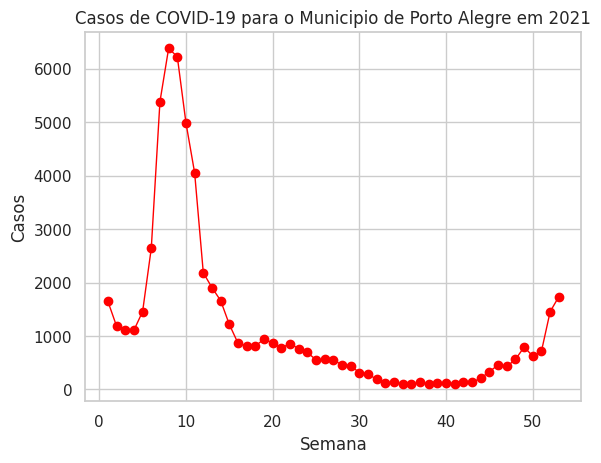

In [28]:
plt.plot(y[y['municipio']==324]['sem_not'], y[y['municipio']==324]['casos'], color='red', marker='o', linewidth=1.0)
plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

In [29]:
# Criando os modelos

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression 

In [30]:
def metricas_avaliacao(atual, pred):
  rmse = np.sqrt(mean_squared_error(atual, pred))
  mae = mean_absolute_error(atual, pred)
  mse = mean_squared_error(atual, pred)
  score = r2_score(atual, pred)

  print("RMSE:", rmse)
  print("MAE:", mae)
  print("MSE:", mse)
  print("R2:", score)

In [31]:
lm = LinearRegression()

lm.fit(X_treino, y_treino['casos'])

LinearRegression()

In [32]:
y_pred = lm.predict(X_teste)
metricas_avaliacao(y_teste['casos'], y_pred)

RMSE: 1.937766310483976e-11
MAE: 9.51450329355639e-12
MSE: 3.7549382740466803e-22
R2: 1.0


In [33]:
print(y_pred)

[ 2. 30. 12. ...  9.  1. 42.]


In [34]:
# Olhando só para Porto Alegre

pred = lm.predict(X_teste[X_teste['municipio']==324])

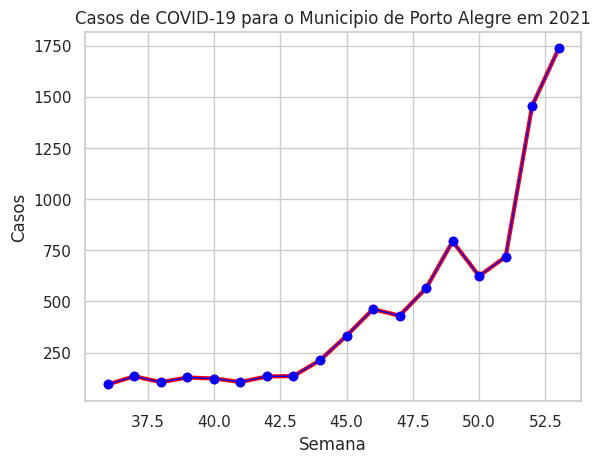

In [35]:
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], y_teste[y_teste['municipio']==324]['casos'], color='red', marker='o', linewidth=3.0)
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], pred, color='blue', marker='o', linewidth=1.0)

plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

# Alguém identificou um erro?

In [36]:
def semanas_faltantes(L, start, end):
    return sorted(set(range(start, end + 1)).difference(L))

In [37]:
dados_group = dados_onehot.groupby(['municipio', 'sem_not'], as_index = False).sum()

In [38]:
dados_group['total'] = dados_group['sexo_Feminino'] + dados_group['sexo_Masculino']

In [39]:
linha_padrao = {'municipio': 0, 
               'sem_not': 0,
               'sexo_Feminino': 0,
               'sexo_Masculino': 0,
               'racacor_Amarela': 0,
               'racacor_Branca': 0,
               'racacor_Ignorado': 0,
               'racacor_Indigena': 0,
               'racacor_Indígena': 0,
               'racacor_Parda': 0,
               'racacor_Preta': 0,
               'comorbidade_0': 0,
               'comorbidade_1': 0,
               'faixa_etaria_(-1, 19]': 0,
               'faixa_etaria_(19, 39]': 0,
               'faixa_etaria_(39, 49]': 0,
               'faixa_etaria_(49, 59]': 0,
               'faixa_etaria_(59, 69]': 0,
               'faixa_etaria_(69, 79]': 0,
               'faixa_etaria_(79, 140]': 0, 'total':0}


for i in range(0, 496):
  semanas = dados_group[dados_group['municipio'] == i]['sem_not'].T.to_list()
  semanas.sort()
  faltantes = semanas_faltantes(semanas, 1, 53)

  for j in faltantes:
    # print(j)
    linha_padrao['municipio'] = i
    linha_padrao['sem_not'] = j

    dados_group = pd.concat([dados_group, pd.DataFrame([linha_padrao])])


In [40]:
dados_group = dados_group.sort_values(['municipio', 'sem_not'])

In [41]:
dados_group = dados_group.reset_index(drop=True)

In [42]:
dados_group['y'] = np.NaN

In [43]:
for i in range(0,496):
  dados_group['y'].iloc[(i*53):(i*53)+53] = dados_group[dados_group['municipio'] == i]['total'].shift(-1)

<ipython-input-43-071102db6dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_group['y'].iloc[(i*53):(i*53)+53] = dados_group[dados_group['municipio'] == i]['total'].shift(-1)


In [44]:
dados_group.head(53)

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,y
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,0,5,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
5,0,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0
6,0,7,4.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0
7,0,8,5.0,4.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,9.0,2.0
8,0,9,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,16.0
9,0,10,5.0,11.0,0.0,14.0,0.0,0.0,0.0,2.0,0.0,14.0,2.0,2.0,5.0,4.0,1.0,0.0,1.0,0.0,16.0,27.0


In [45]:
dados_group = dados_group.dropna()

In [46]:
dados_group

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,y
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
1,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
4,0,5,3.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26282,495,48,36.0,25.0,0.0,36.0,25.0,0.0,0.0,0.0,0.0,59.0,2.0,5.0,22.0,18.0,1.0,0.0,0.0,0.0,61.0,89.0
26283,495,49,50.0,39.0,0.0,46.0,42.0,0.0,0.0,1.0,0.0,87.0,2.0,5.0,36.0,23.0,4.0,0.0,0.0,0.0,89.0,38.0
26284,495,50,21.0,17.0,0.0,17.0,21.0,0.0,0.0,0.0,0.0,36.0,2.0,6.0,13.0,6.0,1.0,0.0,0.0,0.0,38.0,42.0
26285,495,51,25.0,17.0,0.0,16.0,25.0,0.0,0.0,1.0,0.0,41.0,1.0,0.0,14.0,7.0,1.0,0.0,0.0,0.0,42.0,43.0


In [47]:
X.columns

Index(['sem_not', 'municipio', 'sexo_Feminino', 'sexo_Masculino',
       'racacor_Amarela', 'racacor_Branca', 'racacor_Ignorado',
       'racacor_Indigena', 'racacor_Indígena', 'racacor_Parda',
       'racacor_Preta', 'comorbidade_0', 'comorbidade_1',
       'faixa_etaria_(-1, 19]', 'faixa_etaria_(19, 39]',
       'faixa_etaria_(39, 49]', 'faixa_etaria_(49, 59]',
       'faixa_etaria_(59, 69]', 'faixa_etaria_(69, 79]',
       'faixa_etaria_(79, 140]', 'homens', 'mulheres', 'branca', 'preta',
       'amarela', 'parda', 'indigena', 'ignorado', 'urbana', 'rural',
       'comorbidades'],
      dtype='object')

In [48]:
dados_group = dados_group.sort_values(['sem_not', 'municipio'])

In [49]:
X = pd.merge(left=dados_group, right=dados_mun, how='left', left_on='municipio', right_on='municipio')

In [50]:
# faz a contagem de casos por semana de notificacao para cada municipio
y = (X['y']).to_frame(name='casos')
y['municipio'] = X['municipio']
y['sem_not'] = X['sem_not']

# TODO
# Considerar os casos das semanas anteriores
# Pode auxiliar
# E olhar pro passado pode :)

In [51]:
X = X.drop(['y'], axis=1)

In [52]:
y

,casos,municipio,sem_not
0,1.0,0,1
1,6.0,1,1
2,60.0,2,1
3,20.0,3,1
4,6.0,4,1
...,...,...,...
25787,1.0,491,52
25788,1.0,492,52
25789,9.0,493,52
25790,1.0,494,52


In [53]:
X

,municipio,sem_not,sexo_Feminino,sexo_Masculino,racacor_Amarela,racacor_Branca,racacor_Ignorado,racacor_Indigena,racacor_Indígena,racacor_Parda,racacor_Preta,comorbidade_0,comorbidade_1,"faixa_etaria_(-1, 19]","faixa_etaria_(19, 39]","faixa_etaria_(39, 49]","faixa_etaria_(49, 59]","faixa_etaria_(59, 69]","faixa_etaria_(69, 79]","faixa_etaria_(79, 140]",total,homens,mulheres,branca,preta,amarela,parda,indigena,ignorado,urbana,rural,comorbidades
0,0,1,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,2303,2091,3533,338,33.0,489,1.0,0.0,1059,3335.0,496
1,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1879,1843,3085,48,6.0,344,239.0,0.0,1447,2275.0,371
2,2,1,21.0,21.0,0.0,35.0,4.0,0.0,0.0,3.0,0.0,36.0,6.0,4.0,14.0,10.0,4.0,0.0,0.0,0.0,42.0,8349,8373,14593,517,75.0,1534,3.0,0.0,6889,9833.0,1670
3,3,1,11.0,7.0,0.0,17.0,0.0,0.0,0.0,1.0,0.0,18.0,0.0,1.0,9.0,7.0,0.0,0.0,0.0,0.0,18.0,3585,3670,6229,120,10.0,868,28.0,0.0,4108,3147.0,679
4,4,1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3512,3533,5849,104,20.0,1071,1.0,0.0,2165,4880.0,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25787,491,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819,750,1449,12,4.0,104,0.0,0.0,463,1106.0,153
25788,492,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1395,1364,2507,59,14.0,177,2.0,0.0,965,1794.0,297
25789,493,52,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1794,1691,2768,162,37.0,517,1.0,0.0,669,2816.0,284
25790,494,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406,1387,2696,34,1.0,62,0.0,0.0,1130,1663.0,316


In [54]:
# TODO 
# separa 70% para treinamento e 30% para teste
# essa metodologia pode ser melhorada considerando 70% das semanas

qnt = int(X.shape[0] * 0.70)
print("Foram considerados: ", qnt, "registros para o treinamento")

print("Foram considerados: ", X.shape[0] - qnt, "registros para o teste")

X_treino = X.iloc[:qnt, :]
X_teste = X.iloc[qnt:, :]

y_treino = y.iloc[:qnt, :]
y_teste = y.iloc[qnt:, :]

Foram considerados:  18054 registros para o treinamento
Foram considerados:  7738 registros para o teste


In [55]:
y[y['casos']== y['casos'].max()]

,casos,municipio,sem_not
3300,6381.0,324,7


In [56]:
municipio_le.inverse_transform([y[y['casos']== y['casos'].max()]['municipio']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['porto alegre'], dtype=object)

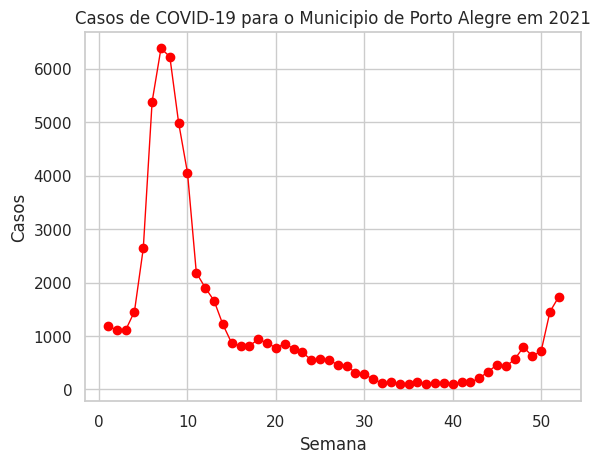

In [57]:
plt.plot(y[y['municipio']==324]['sem_not'], y[y['municipio']==324]['casos'], color='red', marker='o', linewidth=1.0)
plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

### Linear Regression

In [58]:
lm = LinearRegression()

lm.fit(X_treino, y_treino['casos'])

LinearRegression()

In [59]:
y_pred_lm = lm.predict(X_teste)
metricas_avaliacao(y_teste['casos'], y_pred_lm)

RMSE: 27.630633096845877
MAE: 12.943943422880487
MSE: 763.4518853325147
R2: 0.8826090257432755


In [60]:
print(y_pred)

[ 2. 30. 12. ...  9.  1. 42.]


In [61]:
# Olhando só para Porto Alegre

pred = lm.predict(X_teste[X_teste['municipio']==324])

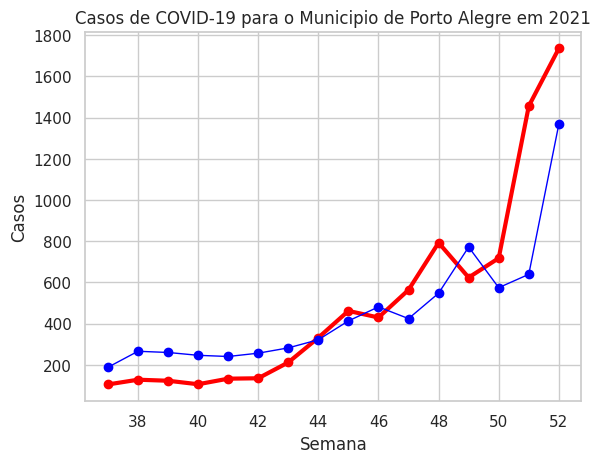

In [62]:
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], y_teste[y_teste['municipio']==324]['casos'], color='red', marker='o', linewidth=3.0)
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], pred, color='blue', marker='o', linewidth=1.0)

plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

### Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor()

rf.fit(X_treino, y_treino['casos'])

RandomForestRegressor()

In [65]:
y_pred_rm = rf.predict(X_teste)

In [66]:
print("Linear Regression\n\n")
metricas_avaliacao(y_teste['casos'], y_pred_lm)

print("RandomForest Regression\n\n")
metricas_avaliacao(y_teste['casos'], y_pred_rm)

Linear Regression


RMSE: 27.630633096845877
MAE: 12.943943422880487
MSE: 763.4518853325147
R2: 0.8826090257432755
RandomForest Regression


RMSE: 22.92218366546433
MAE: 6.870965365727578
MSE: 525.4265039932799
R2: 0.9192086228496095


In [67]:
X_teste.columns

Index(['municipio', 'sem_not', 'sexo_Feminino', 'sexo_Masculino',
       'racacor_Amarela', 'racacor_Branca', 'racacor_Ignorado',
       'racacor_Indigena', 'racacor_Indígena', 'racacor_Parda',
       'racacor_Preta', 'comorbidade_0', 'comorbidade_1',
       'faixa_etaria_(-1, 19]', 'faixa_etaria_(19, 39]',
       'faixa_etaria_(39, 49]', 'faixa_etaria_(49, 59]',
       'faixa_etaria_(59, 69]', 'faixa_etaria_(69, 79]',
       'faixa_etaria_(79, 140]', 'total', 'homens', 'mulheres', 'branca',
       'preta', 'amarela', 'parda', 'indigena', 'ignorado', 'urbana', 'rural',
       'comorbidades'],
      dtype='object')

In [68]:
# Olhando só para Porto Alegre

pred = rf.predict(X_teste[X_teste['municipio']==324])

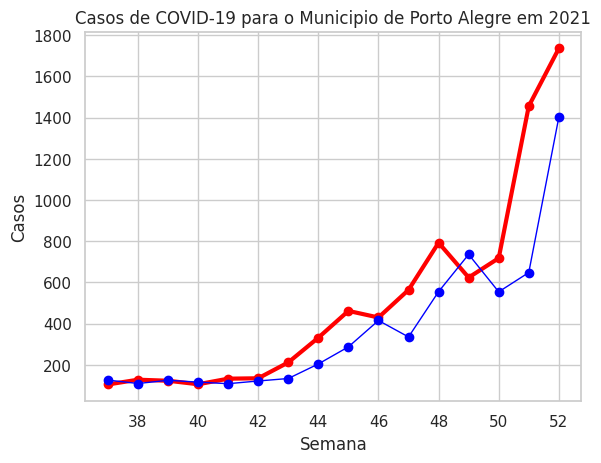

In [69]:
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], y_teste[y_teste['municipio']==324]['casos'], color='red', marker='o', linewidth=3.0)
plt.plot(y_teste[y_teste['municipio']==324]['sem_not'], pred, color='blue', marker='o', linewidth=1.0)

plt.title(r'Casos de COVID-19 para o Municipio de Porto Alegre em 2021', fontsize=12)
plt.xlabel('Semana')
plt.ylabel('Casos')
plt.show()

# Deploy

In [70]:
import joblib

joblib.dump(rf, 'randomforest.pkl')

['randomforest.pkl']

In [71]:
joblib.dump(rf, 'model.joblib', compress=9)

['model.joblib']